<a href="https://colab.research.google.com/github/Bhavya171/LLM_From_Scratch/blob/main/Chapter_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3

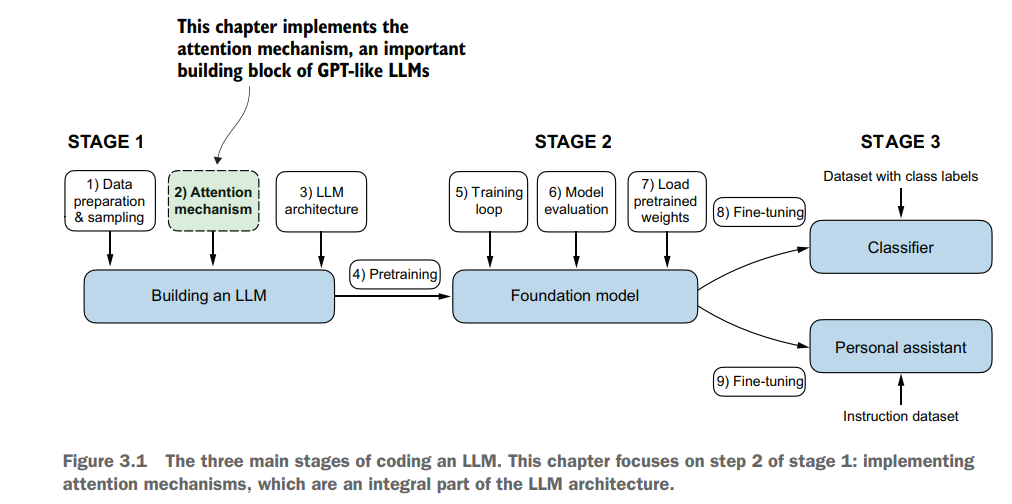

Self Attention:


*   In self-attention, our goal is to calculate context vectors z(i) for each element x(i) in the input sequence.
*   A context vector can be interpreted as an enriched embedding vector.






In [ ]:
import torch

inputs = torch.tensor(
    [[0.43, 0.15, 0.89],
     [0.55, 0.87, 0.66],
     [0.57, 0.85, 0.64],
     [0.22, 0.58, 0.33],
     [0.77, 0.25, 0.10],
     [0.05, 0.80, 0.55]]
)

In [ ]:
query = inputs[1]
attn_scores_2 = torch.empty(inputs.shape[0])
for i, x_i in enumerate(inputs):
  attn_scores_2[i] = torch.dot(x_i,query)
print(attn_scores_2)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


In [ ]:
attn_weights_2_tmp = attn_scores_2/attn_scores_2.sum()
print("WEights: ", attn_weights_2_tmp)
print("sum: ", attn_weights_2_tmp.sum())

WEights:  tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
sum:  tensor(1.0000)


You should use softmax for the things like this

In [ ]:
def sm_n(x):
  return torch.exp(x)/torch.exp(x).sum(dim = 0)

In [ ]:
attn_weights_2_n = sm_n(attn_scores_2)
print("Weights: ", attn_weights_2_n)
print("Sum: ", attn_weights_2_n.sum())

Weights:  tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum:  tensor(1.)


In [ ]:
attn_weights_2 = torch.softmax(attn_scores_2,dim = 0)
print("Weights: ", attn_weights_2)
print("Sum: ", attn_weights_2.sum())

Weights:  tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum:  tensor(1.)


In [ ]:
query = inputs[1]
context_vec_2 = torch.zeros(query.shape)
for i,x_i in enumerate(inputs):
    context_vec_2 += attn_weights_2[i]*x_i
print(context_vec_2)

tensor([0.4419, 0.6515, 0.5683])


In [ ]:
attn_scores = torch.empty(6,6)
for i, x_i in enumerate(inputs):
  for j,x_j in enumerate(inputs):
    attn_scores[i,j] = torch.dot(x_i,x_j)
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [ ]:
# same result using matrix multiplication

attn_scores = inputs @ inputs.T
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [ ]:
attn_weights = torch.softmax(attn_scores,dim = -1)
print(attn_weights)

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])


In [ ]:
print(attn_weights.sum(dim = -1)) # dim = -1 means row wise and dim = 0 means column wise

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


In [ ]:
all_context_vecs = attn_weights @ inputs
print(all_context_vecs)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


---

In [ ]:
x_2 = inputs[1]
d_in = inputs.shape[1]
d_out = 2


In [ ]:
torch.manual_seed(123)
w_q = torch.nn.Parameter(torch.rand(d_in,d_out), requires_grad = False)
w_k = torch.nn.Parameter(torch.rand(d_in,d_out), requires_grad = False)
w_v = torch.nn.Parameter(torch.rand(d_in,d_out), requires_grad = False)



In [ ]:
w_q

Parameter containing:
tensor([[0.2961, 0.5166],
        [0.2517, 0.6886],
        [0.0740, 0.8665]])

In [ ]:
query_2 = x_2 @ w_q
key_2 = x_2 @ w_k
value_2 = x_2 @ w_v
print(query_2)

tensor([0.4306, 1.4551])


In [ ]:
keys = inputs @ w_k
values = inputs @ w_v
print("Keys shape", keys.shape)
print("Inputs shape", values.shape)

Keys shape torch.Size([6, 2])
Inputs shape torch.Size([6, 2])


In [ ]:
print(keys)

tensor([[0.3669, 0.7646],
        [0.4433, 1.1419],
        [0.4361, 1.1156],
        [0.2408, 0.6706],
        [0.1827, 0.3292],
        [0.3275, 0.9642]])


In [ ]:
keys_2 = keys[1]
attn_score_22 = query_2.dot(keys_2)
print(attn_score_22)

tensor(1.8524)


In [ ]:
query_2

tensor([0.4306, 1.4551])

In [ ]:
attn_scores_2 = query_2 @ keys.T
print(attn_scores_2)

tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440])


In [ ]:
d_k = keys.shape[-1]
attn_weights_2 = torch.softmax(attn_scores_2/d_k**0.5,dim = -1) # applying formula
print(attn_weights_2)

tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820])


In [ ]:
context_vec_2 = attn_weights_2 @ values
print(context_vec_2)

tensor([0.3061, 0.8210])


## Implementing a compact self-attention Python class

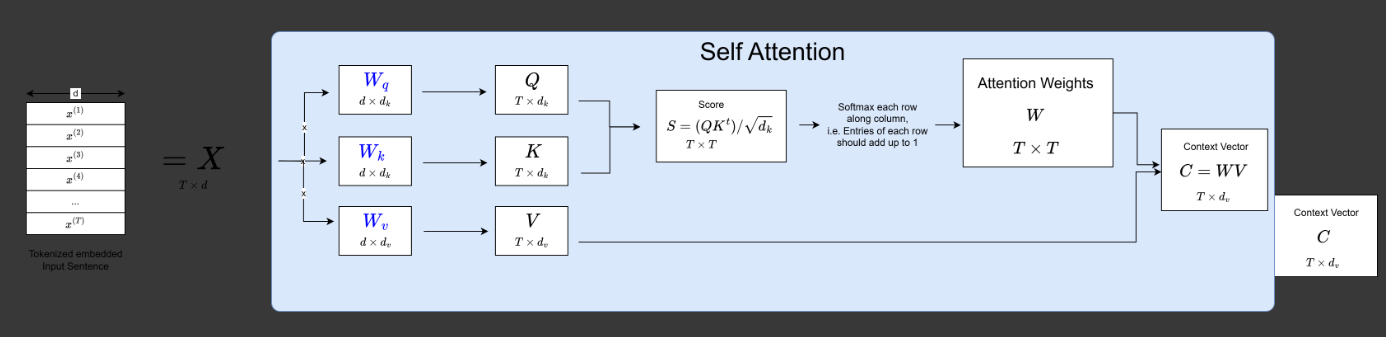

In [ ]:
import torch

inputs = torch.tensor(
    [[0.43, 0.15, 0.89],
     [0.55, 0.87, 0.66],
     [0.57, 0.85, 0.64],
     [0.22, 0.58, 0.33],
     [0.77, 0.25, 0.10],
     [0.05, 0.80, 0.55]]
)

d_in = 3
d_out = 2

In [ ]:
import torch
import torch.nn as nn

class SelfAttention_v1(nn.Module):
  def __init__(self,d_in,d_out):
    super().__init__()
    self.w_q = nn.Parameter(torch.rand(d_in,d_out))
    self.w_k = nn.Parameter(torch.rand(d_in,d_out))
    self.w_v = nn.Parameter(torch.rand(d_in,d_out))


  def forward(self,x):
    keys = x @ self.w_k
    queries = x @ self.w_q
    values = x @ self.w_v

    attn_scores = queries @ keys.T
    attn_weights = torch.softmax(attn_scores / keys.shape[-1] ** 0.5, dim = -1)

    context_v = attn_weights @ values

    return context_v

In [ ]:
torch.manual_seed(123)
b = SelfAttention_v1(d_in = 3, d_out = 2 )


In [ ]:
a = b(inputs)
print(a)

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)


In [ ]:
torch.manual_seed(123)
sa_v1 = SelfAttention_v1(d_in, d_out)
print(sa_v1(inputs))

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)


In [ ]:
# using nn.Linear instead of manually using nn.Parameter for better performance

import torch.nn as nn

class SelfAttention_v2(nn.Module):
  def __init__(self,d_in,d_out,qkv_bias = False):
    super().__init__()
    self.w_q = nn.Linear(d_in,d_out,bias = qkv_bias)
    self.w_k = nn.Linear(d_in,d_out,bias = qkv_bias)
    self.w_v = nn.Linear(d_in,d_out,bias = qkv_bias)


  def forward(self,x):
    keys = self.w_k(x) # notice that we dont need to manually multiply the matrix now thats automatically done
    queries = self.w_q(x) # because we are using nn.Linear
    values = self.w_v(x)

    attn_scores = queries @ keys.T
    attn_weights = torch.softmax(attn_scores / keys.shape[-1] ** 0.5, dim = -1)

    context_v = attn_weights @ values

    return context_v

In [ ]:
torch.manual_seed(789)
sa_v2 = SelfAttention_v2(d_in, d_out)
print(sa_v2(inputs))

tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)


In [ ]:
class MultiHead(nn.Module):
  def __init__(self,d_in,d_out):
    super().__init__()
    self.input = SelfAttention_v2(d_in,d_out)
    self.output = []

  def forward(self, x , n):
    for i in range(n):
      self.output.append(self.input(x))
    final = torch.cat(self.output, dim = -1)
    return final



In [ ]:
test = MultiHead(3,2)
out = test(inputs,2)
print(out)

# this print 6x4 because shape of input = 6x3 and dv = 2 so concatenated twice 6x4

tensor([[ 0.3671, -0.3086,  0.3671, -0.3086],
        [ 0.3675, -0.3095,  0.3675, -0.3095],
        [ 0.3675, -0.3094,  0.3675, -0.3094],
        [ 0.3670, -0.3073,  0.3670, -0.3073],
        [ 0.3670, -0.3061,  0.3670, -0.3061],
        [ 0.3672, -0.3085,  0.3672, -0.3085]], grad_fn=<CatBackward0>)


## Causal Attention

Masking the weights above diagonal <br>
this is done so that the dependency of the word should be dependent on all the previous words. Like the third word should be dependent on 1st and 2nd word but not the 4rth and 5th word.

Step 1. Take a matrix here we took the weights matrix for simplicity

In [ ]:
queries = sa_v2.w_q(inputs)
keys = sa_v2.w_k(inputs)
attn_scores = queries @ keys.T
attn_weights = torch.softmax(attn_scores / keys.shape[-1] ** 0.5, dim = -1)
print(attn_weights)



tensor([[0.1921, 0.1646, 0.1652, 0.1550, 0.1721, 0.1510],
        [0.2041, 0.1659, 0.1662, 0.1496, 0.1665, 0.1477],
        [0.2036, 0.1659, 0.1662, 0.1498, 0.1664, 0.1480],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.1661, 0.1564],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.1585],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


Masking can be done using torch.tril this is just a demonstartion of that

In [ ]:
context_length = attn_weights.shape[0]
mask_simple = torch.tril(torch.ones(context_length,context_length))
print(mask_simple)

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])


This matrix can be now multiplied with the weight matrix to zero out the element above the diagnol

Step 2. Mask the matrix

In [ ]:
masked_simple = mask_simple * attn_weights
print(masked_simple)

tensor([[0.1921, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2041, 0.1659, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2036, 0.1659, 0.1662, 0.0000, 0.0000, 0.0000],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.0000, 0.0000],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<MulBackward0>)


Step 3. Normalise the matrix

In [ ]:
rows_sum = masked_simple.sum(dim = -1, keepdim = True)
masked_norm = masked_simple / rows_sum
print(masked_norm)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<DivBackward0>)


But we can use softmax to do the same

In [ ]:
norm_mask = torch.softmax(masked_simple,dim = -1)
print(norm_mask)

tensor([[0.1951, 0.1610, 0.1610, 0.1610, 0.1610, 0.1610],
        [0.1914, 0.1842, 0.1561, 0.1561, 0.1561, 0.1561],
        [0.1861, 0.1792, 0.1793, 0.1518, 0.1518, 0.1518],
        [0.1789, 0.1753, 0.1753, 0.1736, 0.1484, 0.1484],
        [0.1736, 0.1708, 0.1708, 0.1695, 0.1707, 0.1446],
        [0.1712, 0.1666, 0.1666, 0.1646, 0.1666, 0.1644]],
       grad_fn=<SoftmaxBackward0>)


This is not the ideal case so what we can do is that instead of initialising the mask as 0 we can do it to - infinity so when the softmax will be applied it will treat it as e^-inf which is nothing but 0 probability.

In [ ]:
mask = torch.triu(torch.ones(context_length,context_length), diagonal = 1)
masked = attn_scores.masked_fill(mask.bool(),-torch.inf)
print(masked)

tensor([[0.2899,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.4656, 0.1723,   -inf,   -inf,   -inf,   -inf],
        [0.4594, 0.1703, 0.1731,   -inf,   -inf,   -inf],
        [0.2642, 0.1024, 0.1036, 0.0186,   -inf,   -inf],
        [0.2183, 0.0874, 0.0882, 0.0177, 0.0786,   -inf],
        [0.3408, 0.1270, 0.1290, 0.0198, 0.1290, 0.0078]],
       grad_fn=<MaskedFillBackward0>)


In [ ]:
attn_weights = torch.softmax( masked / keys.shape[-1] ** 0.5, dim = -1)
print(attn_weights)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


---

Dropout mechanism is when we randomly drop some values to take care of the overfitting of the model.
<br>
Here we drop 50% of he values but note that other 50% values are increased by a factor of 2( 1/ 0.5) to manage the reduction. This is crucial to maintain the balance of weights.

In [ ]:
torch.manual_seed(123)
dropout = torch.nn.Dropout(0.5)
example = torch.ones(6, 6)
print(dropout(example))

tensor([[2., 2., 2., 2., 2., 2.],
        [0., 2., 0., 0., 0., 0.],
        [0., 0., 2., 0., 2., 0.],
        [2., 2., 0., 0., 0., 2.],
        [2., 0., 0., 0., 0., 2.],
        [0., 2., 0., 0., 0., 0.]])


In [ ]:
torch.manual_seed(123)
print(dropout(attn_weights))

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.8966, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.6206, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4921, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4350, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3327, 0.0000, 0.0000, 0.0000, 0.0000]],
       grad_fn=<MulBackward0>)


---

This means that the text contains 2 input texts with 6 tokens each and each token containing 3 dimensional embedding vector.

In [ ]:
batch = torch.stack((inputs,inputs), dim = 0)
print(batch.shape)

torch.Size([2, 6, 3])


In [ ]:
# A Causal Attention class

import torch.nn as nn

class CausalAttention(nn.Module):
  def __init__(self,d_in,d_out,context_length,dropout,qkv_bias = False):
    super().__init__()

    self.d_out = d_out

    self.w_q = nn.Linear(d_in,d_out)
    self.w_k = nn.Linear(d_in,d_out)
    self.w_v = nn.Linear(d_in,d_out)

    self.dropout = nn.Dropout(dropout)

    self.register_buffer(
        'mask',
        torch.triu(torch.ones(context_length,context_length), diagonal = 1)
    )

  def forward(self, x):

    b, num_tokens, d_in = x.shape

    query = self.w_q(x)
    keys = self.w_k(x)
    values = self.w_v(x)

    attn_scores = query @ keys.transpose(1,2)

    attn_scores.masked_fill_(
        self.mask.bool()[:num_tokens, :num_tokens], -torch.inf
    )

    attn_weights = torch.softmax(attn_scores / keys.shape[-1] ** 0.5, dim = -1)

    attn_weights = self.dropout(attn_weights)

    context_vec = attn_weights @ values

    return context_vec





In [ ]:
torch.manual_seed(123)
context_length = batch.shape[1]
ca = CausalAttention(d_in, d_out,context_length,0.0)
context_vecs = ca(batch)
print(context_vecs.size())

torch.Size([2, 6, 2])


## Multi Head Attention

It is nothing but stacking 2 causal attentions over each another

In [ ]:
# wrapper class which just stacks 2 causal attentions over one another

class MultiHeadAttentionWrapper(nn.Module):
  def __init__(self,d_in,d_out,context_length,dropout,num_heads, qkv_bias = False):
    super().__init__()
    self.heads = nn.ModuleList(
        [CausalAttention(
            d_in,d_out,context_length,dropout,qkv_bias
        )
        for _ in range(num_heads)
        ]
    )

  def forward(self,x):
    return torch.cat([head(x) for head in self.heads], dim = -1)

In [ ]:
torch.manual_seed(123)
context_length = batch.shape[1]
d_in,d_out = 3,2
mha = MultiHeadAttentionWrapper(
    d_in, d_out, context_length, 0.0,num_heads = 2
)
context_vector = mha(batch)

print(context_vector)
print(context_vector.shape)

tensor([[[-0.0960,  0.7940, -0.2296,  0.3355],
         [ 0.0285,  0.9387, -0.3357,  0.3490],
         [ 0.0657,  0.9850, -0.3718,  0.3576],
         [ 0.1062,  0.9604, -0.3583,  0.3177],
         [ 0.0659,  0.9308, -0.3349,  0.3549],
         [ 0.1188,  0.9375, -0.3443,  0.3120]],

        [[-0.0960,  0.7940, -0.2296,  0.3355],
         [ 0.0285,  0.9387, -0.3357,  0.3490],
         [ 0.0657,  0.9850, -0.3718,  0.3576],
         [ 0.1062,  0.9604, -0.3583,  0.3177],
         [ 0.0659,  0.9308, -0.3349,  0.3549],
         [ 0.1188,  0.9375, -0.3443,  0.3120]]], grad_fn=<CatBackward0>)
torch.Size([2, 6, 4])


In [ ]:
# Better Multi Head Attention class which doesnt use causal attention

class MultiHeadAttention(nn.Module):
  def __init__(self,d_in,d_out,context_length,dropout,num_heads,qkv_bias = False):
    super().__init__()
    assert (d_out % num_heads == 0), \
      " d_out must be divisible by num_heads"

    self.d_out = d_out
    self.num_heads = num_heads
    self.head_dim = d_out // num_heads # Reduces the projection dim to match the output dim
    self.w_q = nn.Linear(d_in,d_out,bias = qkv_bias)
    self.w_k = nn.Linear(d_in,d_out,bias = qkv_bias)
    self.w_v = nn.Linear(d_in,d_out,bias = qkv_bias)
    self.out_proj = nn.Linear(d_out,d_out) # for the combination of the outputs
    self.dropout = nn.Dropout(dropout)
    self.register_buffer(
        "mask",
        torch.triu(torch.ones(context_length,context_length), diagonal = 1)
    )


  def forward(self,x):
    b, num_tokens, d_in = x.shape
    keys = self.w_k(x)
    queries = self.w_q(x)
    values = self.w_v(x)

    keys = keys.view(b, num_tokens, self.num_heads, self.head_dim) # we implicitly split the matrix by adding num_heads dim
    queries = queries.view(b, num_tokens, self.num_heads, self.head_dim) # then we unroll the last dim
    values = values.view(b, num_tokens, self.num_heads, self.head_dim) # (b,num_tokens,d_out) -> (b,num_tokens,num_heads,head_dim)

    # transposing from (b,num_tokens,num_heads,head_dim) -> (b,num_heads,num_tokens,head_dim)
    keys = keys.transpose(1,2)
    queries = queries.transpose(1,2)
    values = values.transpose(1,2)

    # this transpose is because of the formula
    attn_scores = queries @ keys.transpose(2,3)
    mask_bool = self.mask.bool()[:num_tokens, :num_tokens] # masks truncated to num_tokens

    attn_scores.masked_fill_(mask_bool, -torch.inf) # using mask to fill scores

    attn_weights = torch.softmax(
        attn_scores / keys.shape[-1] ** 0.5,dim = -1
    )
    attn_weights = self.dropout(attn_weights)

    context_vec = (attn_weights @ values).transpose(1,2) # final shape -> (b,num_tokens,num_heads,head_dim)
    context_vec = context_vec.contiguous().view(
    b, num_tokens, self.d_out
    )
 # combining heads * self.head_dim

    context_vec = self.out_proj(context_vec) # optional linear projection

    return context_vec




In [ ]:
torch.manual_seed(123)
batch_size, context_length, d_in = batch.shape
d_out= 2
mha = MultiHeadAttention(d_in,d_out,context_length,0.0,num_heads = 2)
context_vecs = mha(batch)
print(context_vecs)
print(context_vecs.shape)

tensor([[[0.3190, 0.4858],
         [0.2943, 0.3897],
         [0.2856, 0.3593],
         [0.2693, 0.3873],
         [0.2639, 0.3928],
         [0.2575, 0.4028]],

        [[0.3190, 0.4858],
         [0.2943, 0.3897],
         [0.2856, 0.3593],
         [0.2693, 0.3873],
         [0.2639, 0.3928],
         [0.2575, 0.4028]]], grad_fn=<ViewBackward0>)
torch.Size([2, 6, 2])
